In [763]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [764]:
from IPython.core.display import HTML

In [765]:
#reading csv of known data in to pandas
doc_concepts = pd.DataFrame.from_csv('../../data/cirp_concepts_unwind.csv', index_col=None)
doc_concepts.head()

,_id,event_short_name,event_year,title,abstract,concept,concept_relevance
0,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Engineering,0.853031
1,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Technology,0.790793
2,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Industrial design,0.747593
3,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Katharine McPhee,0.704206
4,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Science,0.658686


In [766]:
#####NUMBER OF UNIQUE DOCUMENTS
dc = doc_concepts
dc._id.nunique()
print('Number of documents:',dc._id.nunique())
print('Total Concepts:', len(dc))
print('Unique Concepts:', dc.concept.nunique())


Number of documents: 1205
Total Concepts: 8985
Unique Concepts: 2220


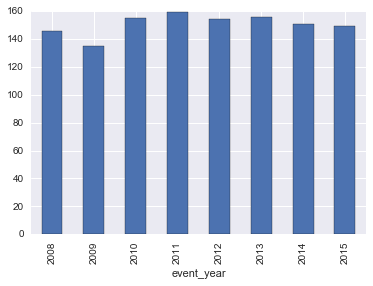

In [767]:
docs = dc.groupby(['event_year'])['_id'].nunique()
docs.plot(kind='bar')

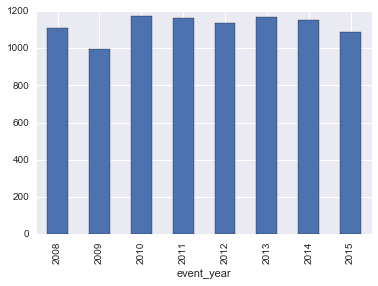

In [768]:
cpts = dc.groupby(['event_year'])['concept'].size()
cpts.plot(kind='bar')

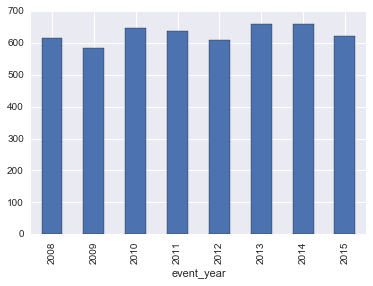

In [769]:
#####NUMBER OF UNIQUE CONCEPTS BY YEAR
u_cpts = dc.groupby(['event_year'])['concept'].nunique()
u_cpts.plot(kind='bar')

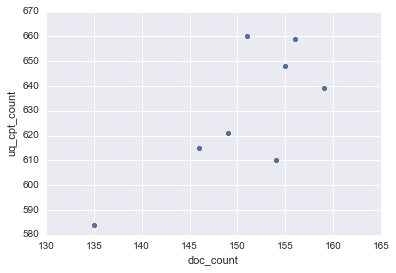

In [770]:
##plot a scatter graph to understand the correlation between number of documents and unique concepts
##it appears that the more documents result in more unique concepts - DOESNT HOLD TRUE
sc_f = pd.DataFrame({'year':docs.index, 'doc_count': docs.values, 'uq_cpt_count':u_cpts.values})
sc_f.plot(kind='scatter', y='uq_cpt_count', x='doc_count')

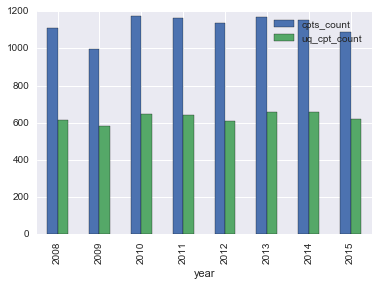

In [771]:
##bar chart of comparison of concepts to unique concepts by year
bc_f = pd.DataFrame({'year':cpts.index, 'cpts_count': cpts.values, 'uq_cpt_count':u_cpts.values})
bc_f.plot(kind='bar', x='year')

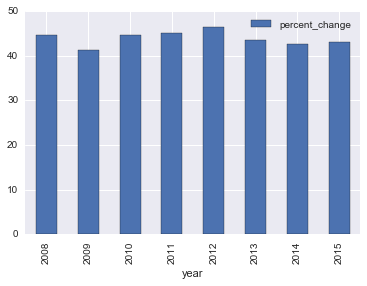

In [772]:
##bar chart of percent difference of concept count, unique concept count by year::
bc_f['percent_change'] = (((bc_f.cpts_count - bc_f.uq_cpt_count))/bc_f.cpts_count) * 100
bc_f.plot(kind='bar', x='year', y='percent_change')

In [773]:
print("relevance mean:", dc['concept_relevance'].mean())
print("relevance median:", dc['concept_relevance'].median())

relevance mean: 0.6770014888146936
relevance median: 0.6619470000000001


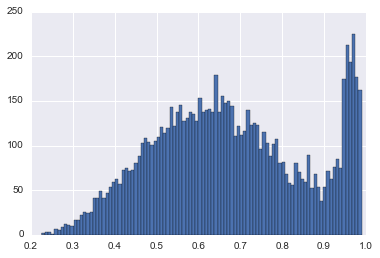

In [774]:
###
### Plot a chart by relevance
###
dc.concept_relevance.hist(bins=100)

In [775]:
#######
###### CUT OFF THE RELEVANCE AT 0.9 to draw sample concepts
######

In [776]:
###adding relevance cutoff of 0.9
dcrel = doc_concepts
dcrel = dcrel[dcrel.concept_relevance >= 0.9]
dcrel._id.nunique()

#####NUMBER OF UNIQUE CONCEPTS
dcrel.concept.nunique()
print('Number of documents:',dcrel._id.nunique())
print('Total Concepts:', len(dcrel))
print('Unique Concepts:', dcrel.concept.nunique())


Number of documents: 1188
Total Concepts: 1553
Unique Concepts: 531


In [777]:
"""Fuction definitions"""
def drawSampleConcepts(obj):
    """Drawing a sample"""
    return obj.sample(10).concept.as_matrix().tolist()

def filterData(dfObj, listOfConcepts):
    """filter data"""
    ##Filter the known data frame with above sample concept array
    fs = dfObj[dfObj.concept.isin(listOfConcepts)].groupby(['event_year', 'concept']).size()   
    yr =[]
    concept=[]
    ct=[]
    for i in fs.iteritems():
        yr.append(i[0][0])
        concept.append(i[0][1])
        ct.append(i[1])
    return pd.DataFrame({'year':yr, 'concept':concept, 'ct':ct})    

def plotHeatMap(filteredData):
    """plotting heat map"""
    sns.heatmap(filteredData.pivot('concept','year').fillna(0),annot=True)
    
def plotPairGrid(filteredData):
    filteredData = filteredf
    """plotting pair grid"""
    pivoted_df = filteredData.pivot('concept','year').fillna(0)
    cols = pivoted_df.ct.columns.tolist()
    cols.append('concept')
    
    idx_vals = pivoted_df.ct.index.values.tolist()
    rows = pivoted_df.ct.values.tolist()

    idx=0
    for r in rows:
        r.append(idx_vals[idx])
        idx+=1        
    f =  pd.DataFrame(rows, columns=cols)
    # Make the PairGrid
    g = sns.PairGrid(f,
                     x_vars=f.columns[0:8], y_vars=["concept"],
                     size=10, aspect=.5)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h",
          palette="Reds_r", edgecolor="gray")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, 25), xlabel="Count", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = ["2008", "2009", "2010",
              "2011", "2012", "2013","2014","2015"]

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    sns.despine(left=True, bottom=True)

sample 1


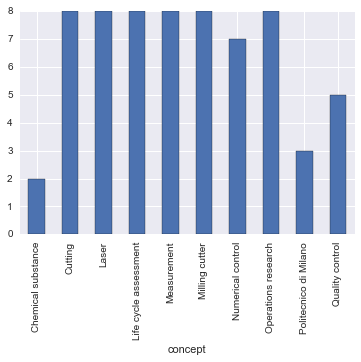

In [778]:
print("sample 1")
concept_sample1 = drawSampleConcepts(dcrel)    
filteredf = filterData(doc_concepts,concept_sample1)
filteredf.groupby('concept').size().plot(kind='bar')

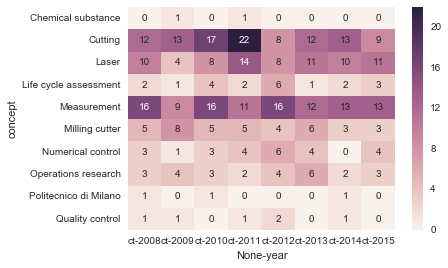

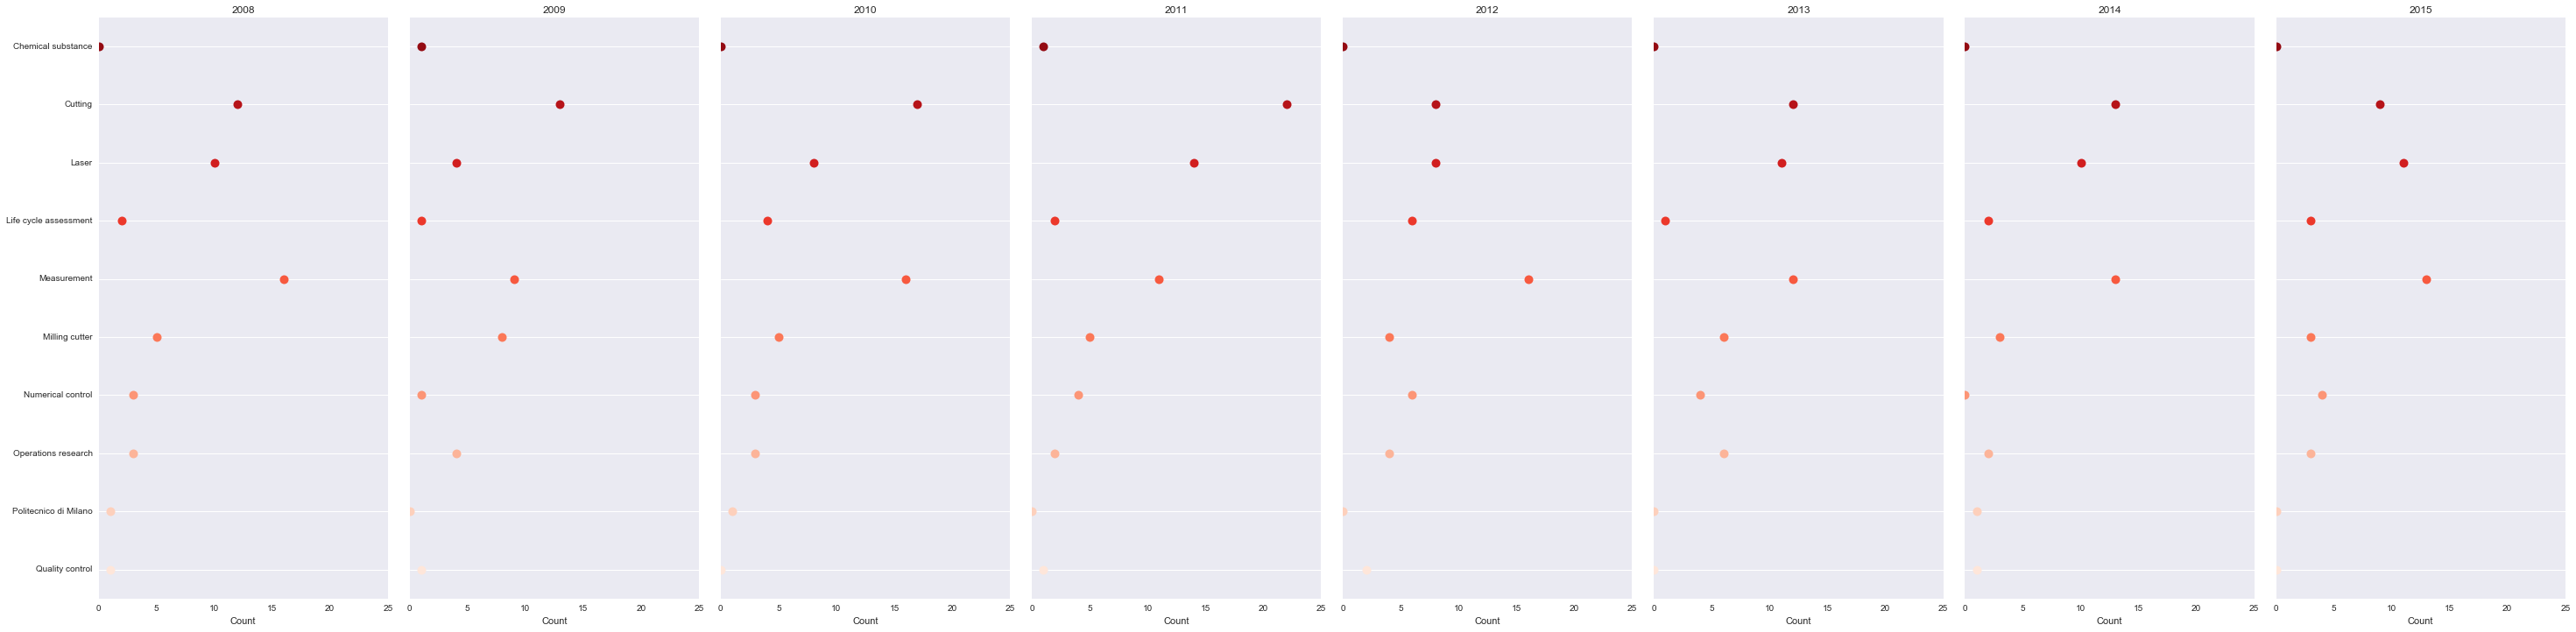

In [779]:
plotHeatMap(filteredf)
plotPairGrid(filteredf)

sample 2


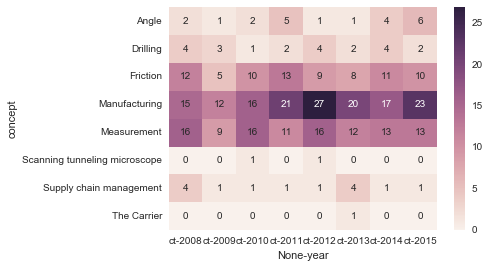

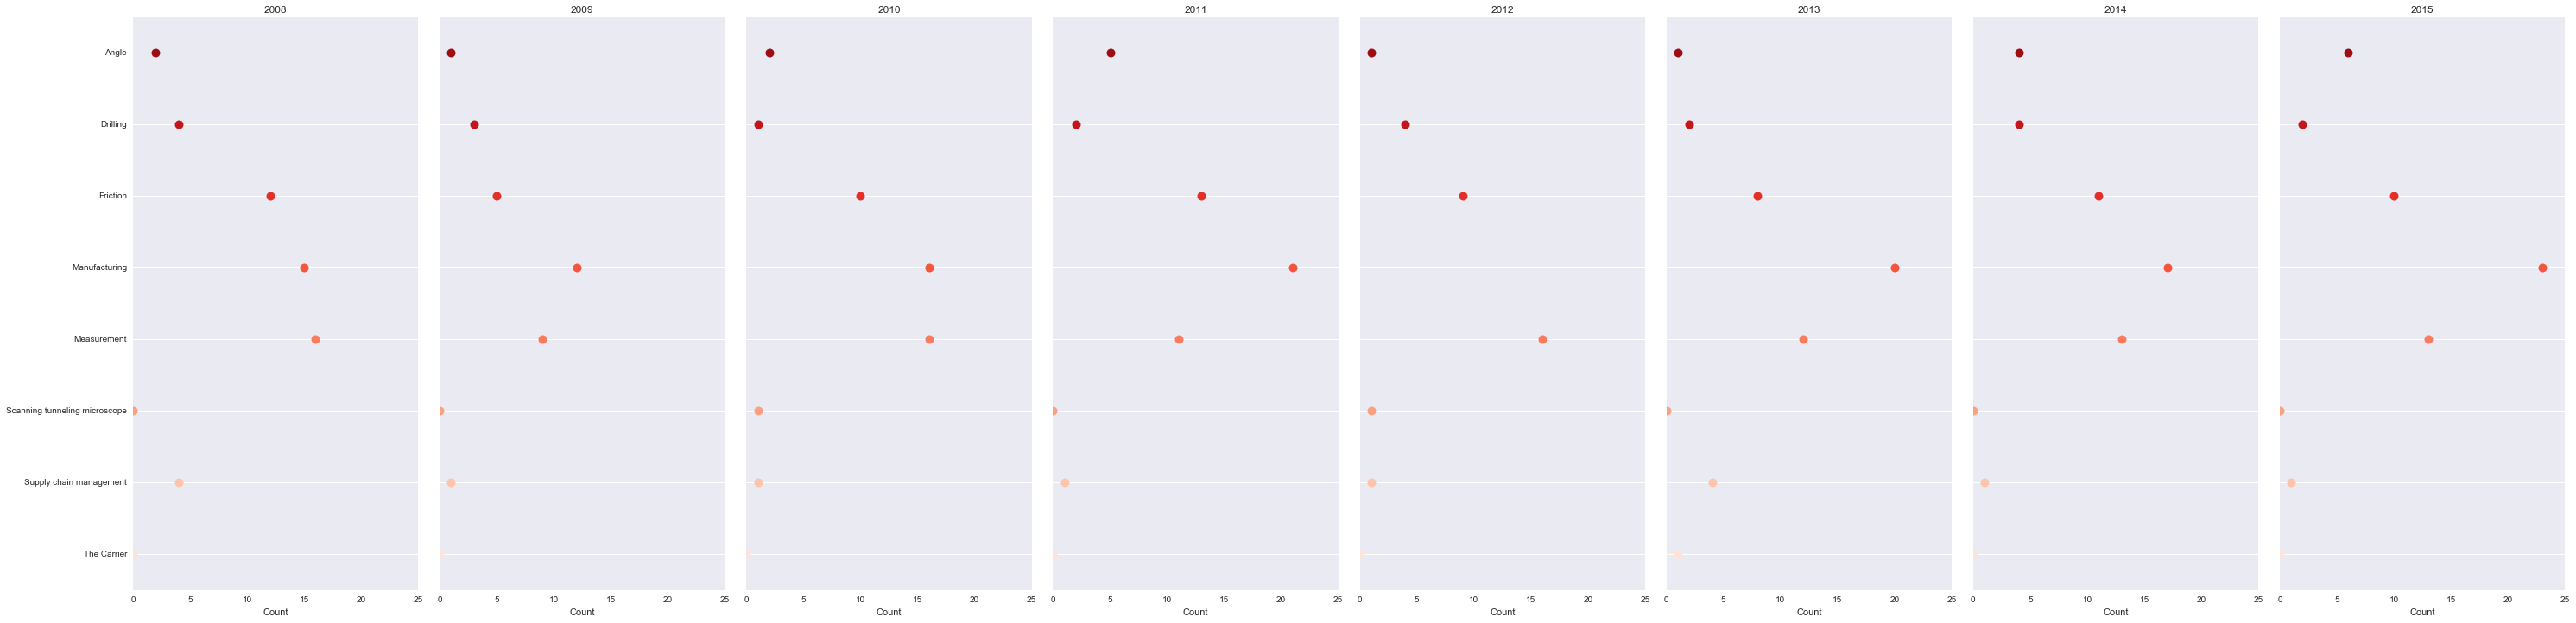

In [780]:
print("sample 2")
concept_sample2 = drawSampleConcepts(dcrel)    
filteredf = filterData(doc_concepts,concept_sample2)
plotHeatMap(filteredf)
plotPairGrid(filteredf)

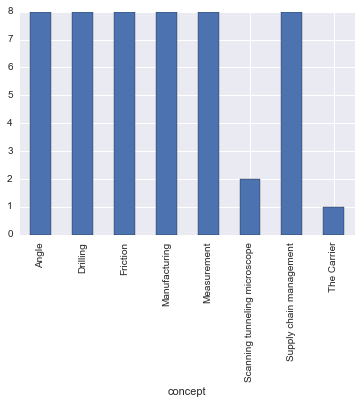

In [781]:
filteredf.groupby('concept').size().plot(kind='bar')

In [782]:
#reading csv of unclassified data in to pandas
unc_df_2008 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2008.csv', index_col=None)
unc_df_2009 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2009.csv', index_col=None)
unc_df_2010 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2010.csv', index_col=None)
unc_df_2011 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2011.csv', index_col=None)
unc_df_2012 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2012.csv', index_col=None)
unc_df_2013 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2013.csv', index_col=None)
unc_df_2014 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2014.csv', index_col=None)
unc_df_2015 = pd.DataFrame.from_csv('../../data/nsf_concepts_unwind_2015.csv', index_col=None)

unc_df = unc_df_2008.append([unc_df_2009,unc_df_2010,unc_df_2011,unc_df_2012,unc_df_2013,unc_df_2014,unc_df_2015])
unc_df.head()

,_id,event_short_name,event_year,concept,concept_relevance
0,NSF_20080101_0851691,NSF,2008.0,Ocean,0.953185
1,NSF_20080101_0851691,NSF,2008.0,Scientific method,0.657547
2,NSF_20080101_0851691,NSF,2008.0,Atlantic Ocean,0.596994
3,NSF_20080101_0851691,NSF,2008.0,Oceanography,0.583006
4,NSF_20080101_0851691,NSF,2008.0,Water,0.570854


In [783]:
##lets get the documents that are unique and store them in a frame, we can use this for sampling.
unc_uq_docs = unc_df.drop_duplicates('_id')
unc_uq_docs.head()

,_id,event_short_name,event_year,concept,concept_relevance
0,NSF_20080101_0851691,NSF,2008.0,Ocean,0.953185
8,NSF_20080101_0825701,NSF,2008.0,Atlantic Ocean,0.989232
16,NSF_20080101_0853294,NSF,2008.0,Monte Carlo methods in finance,0.969555
24,NSF_20080101_0802587,NSF,2008.0,Research,0.909247
26,NSF_20080101_0853108,NSF,2008.0,Protein folding,0.974933


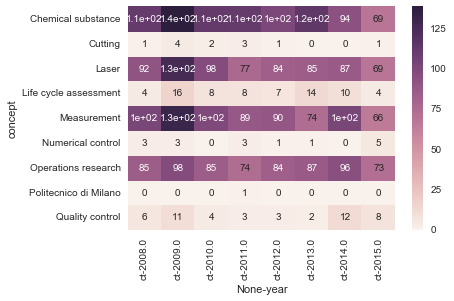

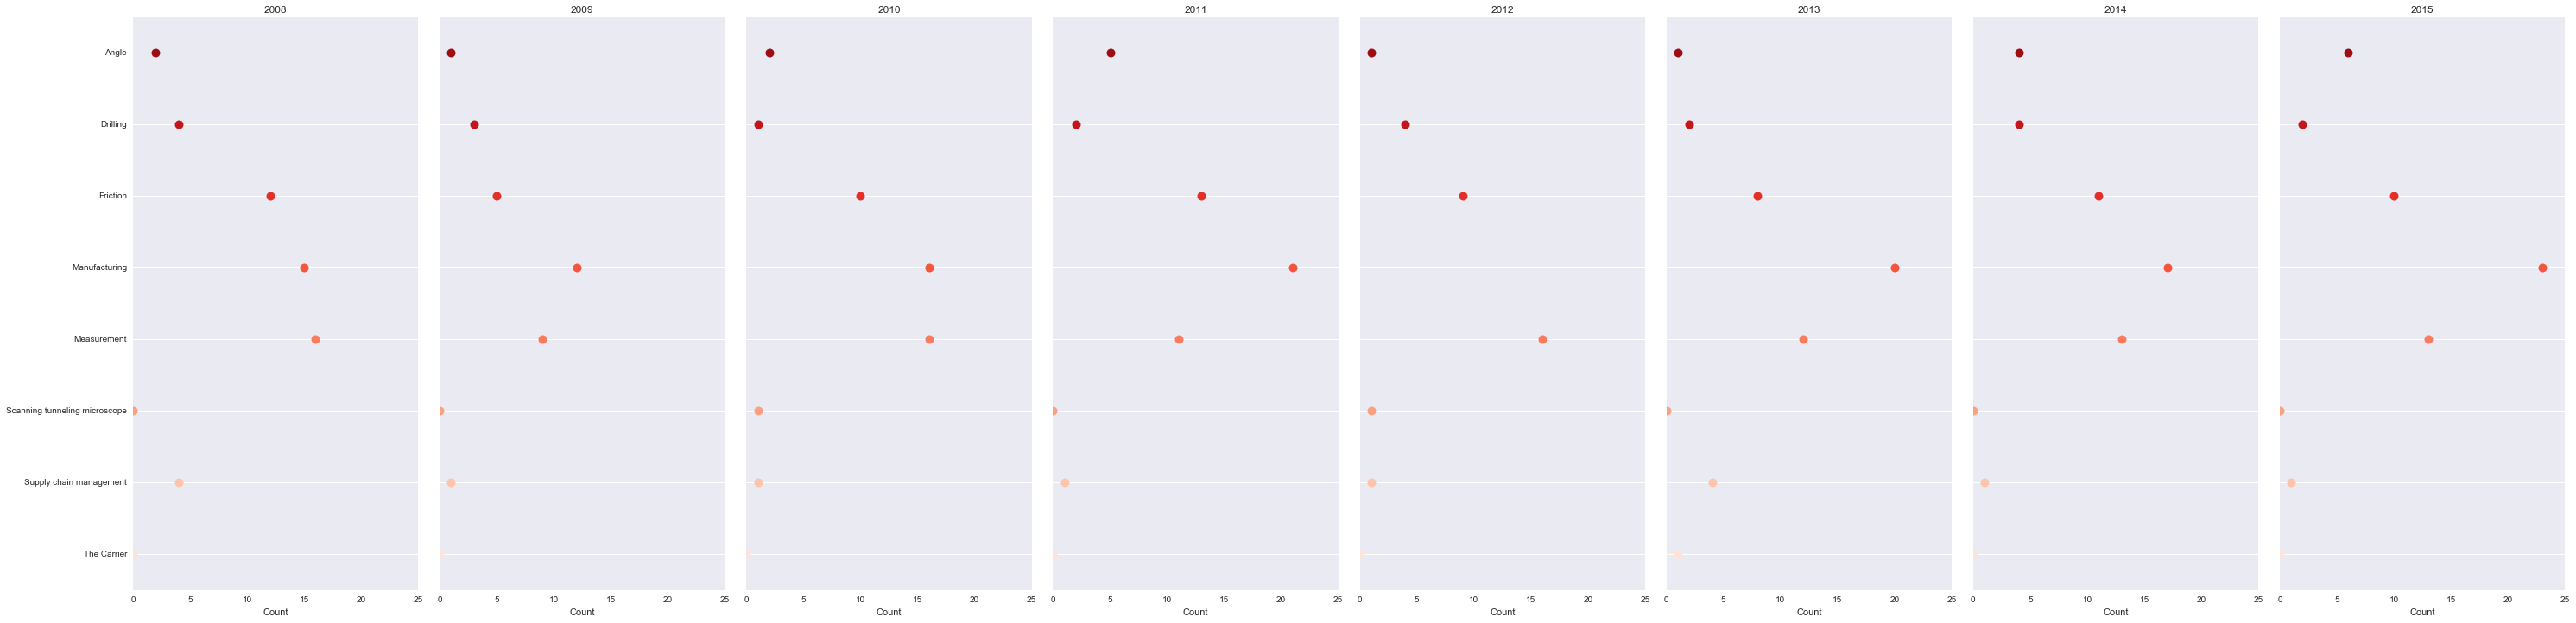

In [784]:
#filter the unc data frame using concept_sample1
#fser = unc_df[unc_df.concept.isin(concept_sample1)].groupby(['event_year', 'concept']).size() 
unc_fltr_df1 = filterData(unc_df,concept_sample1)
plotHeatMap(unc_fltr_df1)
plotPairGrid(unc_fltr_df1)

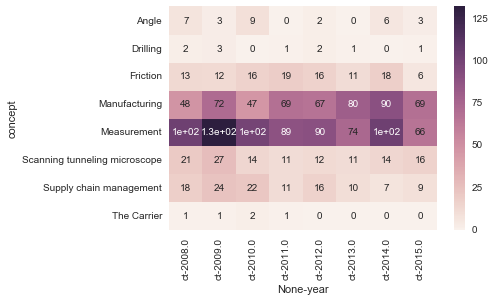

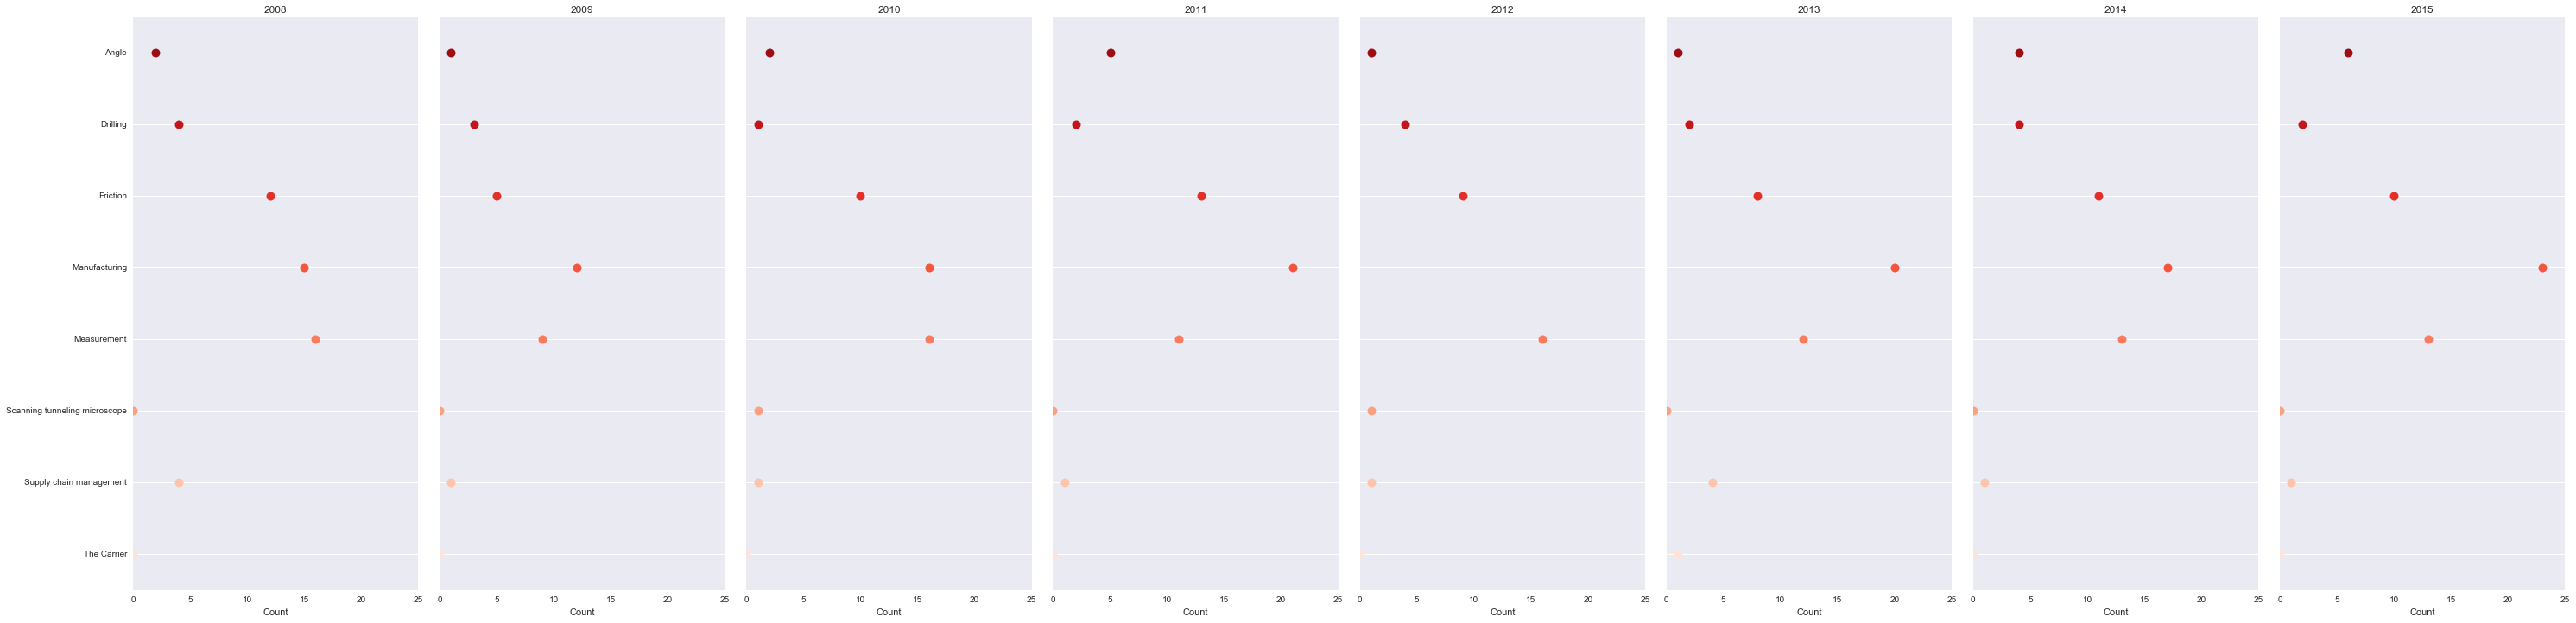

In [785]:
#filter the unc data frame using concept_sample2
unc_fltr_df2 = filterData(unc_df,concept_sample2)
plotHeatMap(unc_fltr_df2)
plotPairGrid(unc_fltr_df2)

In [786]:
###Draw a sample from unclassified dataset, about 1000 documents and use that as a negative sample.
#neg_df_docs = unc_df.join(unc_uq_docs.sample(1000), how='inner')
x = unc_uq_docs.sample(1000).drop(['event_short_name', 'event_year','concept','concept_relevance'], axis = 1)
x.head()
neg_df = pd.merge(unc_df, x , on='_id', how='inner')

In [787]:
print('Number of documents:',neg_df._id.nunique())
print('Total Concepts:', len(neg_df))
print('Unique Concepts:', neg_df.concept.nunique())

Number of documents: 1000
Total Concepts: 7631
Unique Concepts: 2777


Negative Sample filtered by concept_sample1


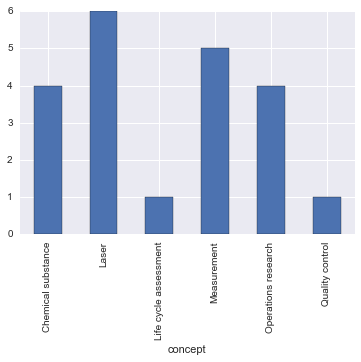

In [788]:
#filter the unc negative sample data frame using concept_sample1
neg_df_fltr1 = filterData(neg_df,concept_sample1)
print("Negative Sample filtered by concept_sample1")
neg_df_fltr1.groupby('concept').size().plot(kind='bar')


Negative Sample filtered by concept_sample2


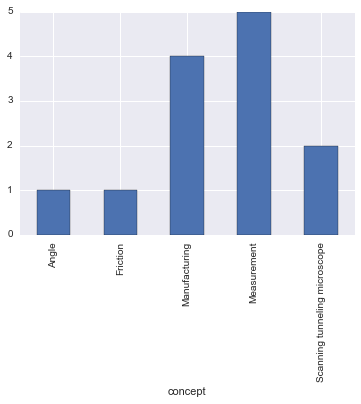

In [789]:
#filter the unc negative sample data frame using concept_sample1
print("Negative Sample filtered by concept_sample2")
neg_df_fltr2 = filterData(neg_df,concept_sample2)
neg_df_fltr2.groupby('concept').size().plot(kind='bar')